In [1]:
import warnings
warnings.filterwarnings('ignore')

from src.data import DataLoaders
from src import utils
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date, datetime
import numpy as np
#import geopandas as geo
import subprocess

from IPython.display import display, Markdown

Create report with: `jupyter nbconvert --to pdf --output withMarkdownPDF --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags=['remove_cell']  --no-input testScript.ipynb`

# Fire Models

In [2]:
expt_num = 2 

In [3]:
# grab version of code 
#subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD'])

In [4]:

  
expt_path =  Path.cwd() / 'Data' /  'Logs' / f'Experiment_{expt_num}'

In [3]:
display(Markdown('**The following columns are being kept**'))
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'pct_alt_heat',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']
print(ACS_cols_to_use)

**The following columns are being kept**

['did_not_work_past_12_mo', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 'inc_pct_poverty', 'race_pct_black_or_amind']


In [6]:
expt_log =  pd.DataFrame( {'Experiment Number': expt_num ,
 'Date': datetime.now(),
 'Log_folder' : expt_path,
 'Code_Repo' :   'NA', #subprocess.check_output(['git', 'config', '--get', 'remote.origin.url']),                        
 'Code_Version': 'NA', #subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).strip(),
 'ACS_Version': '2016',
 'Level': 'block_group',
 'NFIRS_Years_used_start': '2012',                                        
 'NFIRS_Years_used_end': '2017',
 'NFIRS_Year_predicted': '2018',
  'Severity_dollar_estimate' : 10000,
  'ACS_cols_used': [ACS_cols_to_use] 
} )
                                         

In [7]:
from datetime import datetime

In [8]:
print(datetime.now())

2022-08-15 21:07:52.118509


In [9]:
master_log_file_path = expt_path.parent / 'MasterLog.csv'

In [10]:
if master_log_file_path.exists():
    expt_log.to_csv ( master_log_file_path,mode ='a', header = False, index = False )
else:
    expt_log.to_csv ( master_log_file_path, header = True, index = False )

In [4]:
#DataLoaders.ACSData(2016,'block_group')- second parameter is level
ACS =  DataLoaders.ACSData(2016,'block_group')
ACS.data

,state,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
010010201001,AL,745.0,143.0,0.191946,20365.0,0.785235,0.763758,0.214765,0.236242,0.214765,...,0.221831,0.193662,0.584507,0.152047,0.274854,0.508772,0.064327,0.000000,0.214765,0.017606
010010201002,AL,1265.0,56.0,0.044269,33336.0,0.856126,0.826877,0.143874,0.173123,0.082213,...,0.079229,0.085653,0.835118,0.100264,0.153034,0.538259,0.174142,0.034301,0.082213,0.032895
010010202001,AL,955.0,365.0,0.382199,17047.0,0.376042,0.376042,0.623958,0.623958,0.591667,...,0.135678,0.211055,0.653266,0.171053,0.337719,0.394737,0.065789,0.030702,0.591667,0.000000
010010202002,AL,1059.0,118.0,0.111426,21400.0,0.497573,0.488673,0.502427,0.511327,0.461974,...,0.235772,0.075203,0.689024,0.053691,0.513423,0.412752,0.020134,0.000000,0.461974,0.019912
010010203001,AL,2364.0,100.0,0.042301,23106.0,0.626481,0.626481,0.373519,0.373519,0.217851,...,0.030303,0.091887,0.877810,0.057522,0.349558,0.592920,0.000000,0.000000,0.227157,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,WY,1457.0,137.0,0.094029,33781.0,0.950583,0.929307,0.049417,0.070693,0.000000,...,0.308305,0.121729,0.569966,0.089320,0.114563,0.666019,0.091262,0.038835,0.000000,0.366569
560459511002,WY,1582.0,99.0,0.062579,34002.0,0.935884,0.918642,0.064116,0.081358,0.009698,...,0.197500,0.337500,0.465000,0.123438,0.079687,0.525000,0.232812,0.039062,0.014547,0.825737
560459513001,WY,1151.0,301.0,0.261512,23326.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.556757,0.000000,0.443243,0.229282,0.303867,0.466851,0.000000,0.000000,0.000000,0.105163


In [6]:
ACS_tract = DataLoaders.ACSData(2016, 'tract')
ACS_tract.data

,state,tot_population,in_poverty,inc_pct_poverty,inc_pcincome,race_pct_white,race_pct_whitenh,race_pct_nonwhite,race_pct_nonwhitenh,race_pct_black,...,house_yr_pct_before_1960,house_yr_pct_after_2000,house_yr_pct_1960_2000,house_val_less_50K,house_val_50_100K,house_val_100K_300K,house_val_300K_500K,house_val_more_500K,race_pct_black_or_amind,pct_alt_heat
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,AL,2010.0,199.0,0.099005,28528.340796,0.829851,0.803483,0.170149,0.196517,0.131343,...,0.133156,0.126498,0.740346,0.116364,0.190909,0.529091,0.140000,0.023636,0.131343,0.027027
01001020200,AL,2014.0,483.0,0.239821,19335.891261,0.439945,0.435265,0.560055,0.564735,0.523472,...,0.191011,0.135955,0.673034,0.104563,0.437262,0.404943,0.039924,0.013308,0.523472,0.010740
01001020300,AL,3136.0,337.0,0.107462,22439.116071,0.671237,0.671237,0.328763,0.328763,0.205038,...,0.064698,0.140647,0.794655,0.061628,0.368605,0.560465,0.009302,0.000000,0.212054,0.000000
01001020400,AL,4563.0,125.0,0.027394,24451.059172,0.802980,0.799912,0.197020,0.200088,0.064212,...,0.139928,0.021527,0.838544,0.039583,0.215972,0.678472,0.065972,0.000000,0.074732,0.020833
01001020500,AL,10320.0,998.0,0.096705,28388.290988,0.767563,0.757995,0.232437,0.242005,0.172301,...,0.000000,0.523377,0.476623,0.019307,0.009215,0.896007,0.053093,0.022378,0.172301,0.012590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,WY,3050.0,412.0,0.135082,29695.174754,0.901613,0.860842,0.098387,0.139158,0.021639,...,0.191092,0.201149,0.607759,0.121359,0.081553,0.550485,0.140777,0.105825,0.032979,0.400951
56043000301,WY,2495.0,390.0,0.156313,23626.706212,0.947475,0.836735,0.052525,0.163265,0.000000,...,0.650806,0.020721,0.328473,0.000000,0.403206,0.549938,0.033292,0.013564,0.000000,0.029240
56043000302,WY,2629.0,396.0,0.150628,25045.085964,0.872022,0.764226,0.127978,0.235774,0.000000,...,0.223118,0.088710,0.688172,0.112713,0.162516,0.651376,0.039318,0.034076,0.004303,0.029014


In [7]:
#include level 
NFIRS_tract = DataLoaders.NFIRSData('tract',ACS_tract.tot_pop)
NFIRS_Sev_tract = DataLoaders.NFIRSData('tract',ACS_tract.tot_pop,sev=True)

In [8]:
#include level 
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop,sev=True)

In [9]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [10]:
display(Markdown('## Fire Propensity Model'))

FPM.train(NFIRS_tract,ACS_tract,ACS_cols_to_use)
#FPM.train(NFIRS,ACS,ACS_cols_to_use)

## Fire Propensity Model

Predicting 2017:


**Confusion Matrix**

[[54835 12470]
 [  984  4767]]


**ROC AUC Score** = 0.9046108821027705

**Classication Report**

              precision    recall  f1-score   support

       False       0.98      0.81      0.89     67305
        True       0.28      0.83      0.41      5751

    accuracy                           0.82     73056
   macro avg       0.63      0.82      0.65     73056
weighted avg       0.93      0.82      0.85     73056



**Feature Ranking**

1. Max (0.453273)
2. Median (0.146924)
3. pct_alt_heat (0.074831)
4. house_yr_pct_before_1960 (0.068719)
5. inc_pct_poverty (0.066694)
6. house_pct_live_alone (0.065108)
7. race_pct_black_or_amind (0.064773)
8. did_not_work_past_12_mo (0.059677)


In [11]:
display(Markdown('## Fire Severity Model'))

FSM.train(NFIRS_Sev_tract,ACS_tract,ACS_cols_to_use)
#FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

## Fire Severity Model

Predicting 2017:


**Confusion Matrix**

[[54132 16183]
 [  640  2101]]


**ROC AUC Score** = 0.8472723761990104

**Classication Report**

              precision    recall  f1-score   support

       False       0.99      0.77      0.87     70315
        True       0.11      0.77      0.20      2741

    accuracy                           0.77     73056
   macro avg       0.55      0.77      0.53     73056
weighted avg       0.96      0.77      0.84     73056



**Feature Ranking**

1. Max (0.376811)
2. Median (0.122457)
3. inc_pct_poverty (0.086063)
4. race_pct_black_or_amind (0.085480)
5. house_yr_pct_before_1960 (0.085230)
6. did_not_work_past_12_mo (0.084072)
7. pct_alt_heat (0.080340)
8. house_pct_live_alone (0.079547)


In [12]:
ARC =  DataLoaders.ARCPData(ACS, 'ARC Preparedness Data.csv')

# Smoke Alarm Models

In [13]:
SVI =  DataLoaders.SVIData(ACS.data, ACS.tot_pop, 'block_group')
SVI.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
010010201001,0.191946,0.3913,0.5597,0.3735,0.0993
010010201002,0.044269,0.3913,0.5597,0.3735,0.0993
010010202001,0.382199,0.7065,0.3585,0.5821,0.7299
010010202002,0.111426,0.7065,0.3585,0.5821,0.7299
010010203001,0.042301,0.5659,0.8729,0.6429,0.3882
...,...,...,...,...,...
560459511001,0.094029,0.3925,0.6370,0.2331,0.8555
560459511002,0.062579,0.3925,0.6370,0.2331,0.8555
560459513001,0.261512,0.5093,0.6043,0.2862,0.6949


In [14]:
SVI_tract =  DataLoaders.SVIData(ACS_tract.data, ACS.tot_pop, 'tract')
SVI_tract.data

,inc_pct_poverty,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4
geos,,,,,
01001020100,0.099005,0.3913,0.5597,0.3735,0.0993
01001020200,0.239821,0.7065,0.3585,0.5821,0.7299
01001020300,0.107462,0.5659,0.8729,0.6429,0.3882
01001020400,0.027394,0.1825,0.7960,0.3661,0.0585
01001020500,0.096705,0.2801,0.6475,0.4176,0.6590
...,...,...,...,...,...
56043000200,0.135082,0.4619,0.6913,0.1022,0.8124
56043000301,0.156313,0.5088,0.7811,0.3546,0.5951
56043000302,0.150628,0.6885,0.8272,0.3455,0.5388


In [15]:
Smoke = SmokeAlarmModels()

Training State smoke alarm stats model
Training County smoke alarm stats model
Training Tract smoke alarm stats model
Training Block_Group smoke alarm stats model
Training MultiLevel smoke alarm stats model
sm
(4690, 7)
(73056, 7)


**Training Performance**

51.1298735113587
Test RMSE: 7.150515611573665
Test MAE: 5.287045880356895


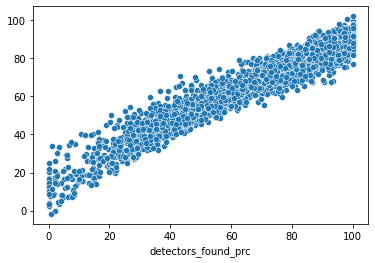

**Testing Performance**

Test RMSE: 21.167437711197913
Test MAE: 16.644794460939192


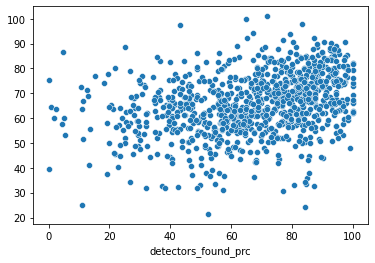

Test Correlation: (0.31876768787407705, 1.3478625051114164e-23)
Test R-squared: 0.0338170152123789


**Feature Ranking**

1. inc_pct_poverty_x (0.152577)
2. RPL_THEME1 (0.138917)
3. race_pct_black_or_amind (0.095578)
4. RPL_THEME3 (0.088987)
5. RPL_THEME2 (0.087714)
6. house_yr_pct_before_1960 (0.083225)
7. RPL_THEME4 (0.080753)
8. pct_alt_heat (0.077934)
9. house_pct_live_alone (0.067406)
10. Population Density (per square mile), 2010 (0.064040)
11. did_not_work_past_12_mo (0.062868)
12. inc_pct_poverty_y (0.000000)


In [16]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS_tract.data,ACS.tot_pop, SVI_tract, ACS_cols_to_use,svi_use, utils.DATA['data'], 'tract')
#smoke_prediction = Smoke.trainModels(ARC,ACS.data,ACS.tot_pop, SVI, ACS_cols_to_use,svi_use, utils.DATA['data'], 'block_group')

# Saving File

In [17]:
level = 'tract'
ACS = ACS_tract
SVI = SVI_tract
NFIRS = NFIRS_tract
NFIRS_Sev = NFIRS_Sev_tract

In [18]:
out = NFIRS.fires.copy()
out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns

In [19]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols]

In [20]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
if level == 'block_group':
    num_surveys = Smoke.models['Block_Group']['num_surveys'].copy()
elif level == 'tract':
    num_surveys = Smoke.models['Tract']['num_surveys'].copy()
else:
    num_surveys = Smoke.models['county']['num_surveys'].copy()
num_surveys.index = num_surveys.index.str[2:]


out['recorded_home_visits'] = num_surveys


# add the statistical model outputs 
if level == 'block_group':
    Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','geography']].copy()
elif level == 'tract':
    Smoke_predicts = Smoke.models['Tract'][
    [ 'detectors_working_prc','detectors_working_CI']].copy()
    Smoke_predicts['geography'] =  'NA'
else:
    Smoke_predicts = Smoke.models['County'][
    [ 'detectors_working_prc','detectors_working_CI']].copy() 
    Smoke_predicts['geography'] =  'NA'
    
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
#DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [37]:
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,detectors_working_prc,detectors_working_CI,geography,"Population Density (per square mile), 2010"
GEOID,,,,,,,,,,,,,,
010010201001,1.342282,2.684564,NaN,NaN,NaN,NaN,NaN,1.342282,1.342282,0,31.38,1.089020,state,504.8
010010201002,1.581028,0.790514,NaN,1.581028,0.790514,NaN,1.581028,0.790514,NaN,0,31.38,1.089020,state,504.8
010010202001,1.047120,NaN,3.141361,NaN,1.047120,1.047120,1.047120,1.047120,NaN,0,31.38,1.089020,state,1682.5
010010202002,2.832861,2.832861,2.832861,0.944287,0.944287,NaN,0.944287,NaN,3.777148,0,31.38,1.089020,state,1682.5
010010203001,0.846024,1.269036,0.846024,0.423012,1.269036,0.423012,0.423012,0.846024,NaN,0,31.38,1.089020,state,1633.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560459511001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.372684,NaN,0,38.90,3.199404,state,1.4
560459511002,0.632111,NaN,NaN,NaN,NaN,NaN,0.632111,NaN,NaN,0,38.90,3.199404,state,1.4
560459513001,0.868810,NaN,0.868810,NaN,0.868810,0.868810,NaN,NaN,1.737619,3,38.90,3.199404,state,91.0


In [21]:
## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [22]:
out['smoke_detector_risk_frac'] =  1 - out['detectors_predicted'] / 100
out['smoke_detector_risk_score'] =  out['smoke_detector_risk_frac'].rank(pct=True)
out[['smoke_detector_risk_frac','smoke_detector_risk_score']]

,smoke_detector_risk_frac,smoke_detector_risk_score
GEOID,,
01001020100,0.229394,0.294459
01001020200,0.325641,0.577653
01001020300,0.290982,0.477155
01001020400,0.096399,0.033303
01001020500,0.072803,0.017096
...,...,...
56043000200,0.441117,0.834839
56043000301,0.252113,0.361353
56043000302,0.281404,0.448971


In [23]:
# add final invidual predictors 

out['SVI_Theme_1'] = SVI.data['RPL_THEME1'].replace(-999.0, np.NaN)

out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,1]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,1]



In [24]:
# create and add final predictor 

#create fire_risk_score by weighing propensity and severity at a .8 to .2 ratio.
#We want the fire_risk_score to be half of the overall combinedRiskScore so multiple the fire_risk_score by 2.
out['fire_prop_weighted'] = out['fire_propensity_risk_score']*0.8
out['fire_sev_weighted'] = out['fire_severity_risk_score']*0.2
out['fire_risk_score'] = out['fire_prop_weighted']+out['fire_sev_weighted']

out['CombinedRiskScore'] =  out.loc[:,['smoke_detector_risk_score',
                                       'fire_risk_score'] ].mean(axis = 1, skipna = True) #False )

In [25]:
display(Markdown('**Combined Risk Score Summary:**'))

out['CombinedRiskScore'].describe()

**Combined Risk Score Summary:**

count    73056.000000
mean         0.389343
std          0.230367
min          0.000889
25%          0.204436
50%          0.371145
75%          0.530520
max          0.999167
Name: CombinedRiskScore, dtype: float64

In [26]:
out_name = f"CombinedModels-basic{level}-{date.today()}.csv"
out_save = out.copy()
out_save.index = '#_' + out_save.index
out_save.to_csv(utils.DATA['model-outputs'] / out_name)

In [27]:
# alternate risk score ideas 

#out['CombinedRiskScore'] = (out[["fire_severity_risk_score", "fire_propensity_risk_score"]].max(axis=1) + out['smoke_detector_risk_score'])*100

In [28]:
out_columns = ['state','NFIRS_start','NFIRS_end','years_fires_reported','total_fires_reported', 'max_fires_1k', 
               'median_fires_1k','total_fires_reported_sev', 'max_fires_1k_sev', 'median_fires_1k_sev',
               'fire_propensity_risk_score','fire_severity_risk_score', 'fire_risk_score', 'recorded_home_visits',
              'smoke_detector_risk_frac', 'smoke_detector_risk_score','geography', 'SVI_Theme_1','CombinedRiskScore',
              'did_not_work_past_12_mo', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
               'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
               'inc_hhmean', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
               'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
               'race_pct_two+','age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
               'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking', 'state_id', 'state_rank', 'county_id', 'county_rank']
display(Markdown('**Saving columns:**'))
out_columns

**Saving columns:**

['state',
 'NFIRS_start',
 'NFIRS_end',
 'years_fires_reported',
 'total_fires_reported',
 'max_fires_1k',
 'median_fires_1k',
 'total_fires_reported_sev',
 'max_fires_1k_sev',
 'median_fires_1k_sev',
 'fire_propensity_risk_score',
 'fire_severity_risk_score',
 'fire_risk_score',
 'recorded_home_visits',
 'smoke_detector_risk_frac',
 'smoke_detector_risk_score',
 'geography',
 'SVI_Theme_1',
 'CombinedRiskScore',
 'did_not_work_past_12_mo',
 'house_pct_live_alone',
 'pct_alt_heat',
 'house_yr_pct_before_1960',
 'inc_pct_poverty',
 'race_pct_black_or_amind',
 'tot_population',
 'house_tot_occ_cnt',
 'inc_pcincome',
 'inc_hhmean',
 'race_pct_white',
 'race_pct_whitenh',
 'race_pct_whiteh',
 'race_pct_nwhitenh',
 'race_pct_hisp',
 'race_pct_black',
 'race_pct_amind',
 'race_pct_asian',
 'race_pct_napi',
 'race_pct_other',
 'race_pct_two+',
 'age_pct_under25',
 'age_pct_over65',
 'disability_pct',
 'snap_past_12_mo',
 'single_unit_home',
 'multi_unit_home',
 'mobile_home',
 'boat_van_rv_ho

In [29]:
years = FSM.years_used
years

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype=object)

In [30]:
out['NFIRS_start'] = min(years)
out['NFIRS_start'] = out['NFIRS_start'].astype(int)
out['NFIRS_end'] = max(years)
out['NFIRS_end'] = out['NFIRS_end'].astype(int)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,smoke_detector_risk_score,SVI_Theme_1,fire_propensity_risk_score,fire_severity_risk_score,fire_prop_weighted,fire_sev_weighted,fire_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,1.492537,1.492537,NaN,0.995025,0.497512,NaN,0.995025,0.995025,0.497512,0,...,0.294459,0.3913,0.100898,0.625219,0.080719,0.125044,0.205762,0.250111,2011,2017
01001020200,1.986097,1.489573,2.979146,0.496524,0.993049,0.496524,0.993049,0.496524,1.986097,0,...,0.577653,0.7065,0.022618,0.969299,0.018094,0.193860,0.211954,0.394803,2011,2017
01001020300,1.275510,0.956633,1.275510,0.637755,1.275510,0.318878,1.275510,1.275510,0.956633,0,...,0.477155,0.5659,0.033768,0.177502,0.027014,0.035500,0.062515,0.269835,2011,2017
01001020400,1.753233,0.219154,0.876616,NaN,0.657462,0.219154,0.876616,0.219154,0.876616,0,...,0.033303,0.1825,0.028029,0.259868,0.022423,0.051974,0.074397,0.053850,2011,2017
01001020500,0.581395,0.872093,0.678295,0.484496,0.775194,0.290698,1.065891,0.872093,0.581395,1,...,0.017096,0.2801,0.027754,0.089576,0.022203,0.017915,0.040118,0.028607,2011,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,0.983607,0.327869,NaN,NaN,NaN,NaN,NaN,0.327869,0.327869,2,...,0.834839,0.4619,0.058458,0.096192,0.046767,0.019238,0.066005,0.450422,2011,2017
56043000301,2.004008,NaN,1.202405,0.801603,NaN,0.400802,NaN,1.202405,0.400802,1,...,0.361353,0.5088,0.176917,0.176830,0.141534,0.035366,0.176900,0.269126,2011,2017
56043000302,NaN,0.380373,NaN,NaN,NaN,NaN,1.141118,0.380373,0.380373,2,...,0.448971,0.6885,0.039264,0.364478,0.031412,0.072896,0.104307,0.276639,2011,2017


In [31]:
fires_trained = NFIRS.fires_noAdjustment[years]
fires_trained2 = fires_trained>0
fires_trained2['years_fires_reported']= fires_trained2.sum(axis = 1)
fires_trained2 = fires_trained2['years_fires_reported']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires_noAdjustment[years]
fires_trained['total_fires_reported'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS.fires[years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,fire_prop_weighted,fire_sev_weighted,fire_risk_score,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,1.492537,1.492537,NaN,0.995025,0.497512,NaN,0.995025,0.995025,0.497512,0,...,0.080719,0.125044,0.205762,0.250111,2011,2017,5.0,8.0,0.995025,0.995025
01001020200,1.986097,1.489573,2.979146,0.496524,0.993049,0.496524,0.993049,0.496524,1.986097,0,...,0.018094,0.193860,0.211954,0.394803,2011,2017,7.0,17.0,2.979146,0.993049
01001020300,1.275510,0.956633,1.275510,0.637755,1.275510,0.318878,1.275510,1.275510,0.956633,0,...,0.027014,0.035500,0.062515,0.269835,2011,2017,7.0,22.0,1.275510,1.275510
01001020400,1.753233,0.219154,0.876616,NaN,0.657462,0.219154,0.876616,0.219154,0.876616,0,...,0.022423,0.051974,0.074397,0.053850,2011,2017,6.0,17.0,0.876616,0.767039
01001020500,0.581395,0.872093,0.678295,0.484496,0.775194,0.290698,1.065891,0.872093,0.581395,1,...,0.022203,0.017915,0.040118,0.028607,2011,2017,7.0,49.0,1.065891,0.678295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,0.983607,0.327869,NaN,NaN,NaN,NaN,NaN,0.327869,0.327869,2,...,0.046767,0.019238,0.066005,0.450422,2011,2017,2.0,2.0,0.327869,0.327869
56043000301,2.004008,NaN,1.202405,0.801603,NaN,0.400802,NaN,1.202405,0.400802,1,...,0.141534,0.035366,0.176900,0.269126,2011,2017,5.0,10.0,1.202405,0.801603
56043000302,NaN,0.380373,NaN,NaN,NaN,NaN,1.141118,0.380373,0.380373,2,...,0.031412,0.072896,0.104307,0.276639,2011,2017,3.0,5.0,1.141118,0.380373


In [32]:
fires_trained = NFIRS_Sev.fires_noAdjustment[years]
fires_trained['total_fires_reported_sev'] = fires_trained.sum(axis = 1)
fires_trained = fires_trained['total_fires_reported_sev']
out = out.merge(fires_trained, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[years]
fires_trained2 = np.nanmax(fires_trained, axis =1)
fires_trained['max_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['max_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)

fires_trained = NFIRS_Sev.fires[years]
fires_trained2 = np.nanmedian(fires_trained, axis =1)
fires_trained['median_fires_1k_sev'] = fires_trained2
fires_trained2 = fires_trained['median_fires_1k_sev']
out = out.merge(fires_trained2, how = 'left', left_index = True, right_index = True)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,CombinedRiskScore,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,median_fires_1k_sev
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,1.492537,1.492537,NaN,0.995025,0.497512,NaN,0.995025,0.995025,0.497512,0,...,0.250111,2011,2017,5.0,8.0,0.995025,0.995025,4.0,0.995025,0.497512
01001020200,1.986097,1.489573,2.979146,0.496524,0.993049,0.496524,0.993049,0.496524,1.986097,0,...,0.394803,2011,2017,7.0,17.0,2.979146,0.993049,5.0,0.993049,0.993049
01001020300,1.275510,0.956633,1.275510,0.637755,1.275510,0.318878,1.275510,1.275510,0.956633,0,...,0.269835,2011,2017,7.0,22.0,1.275510,1.275510,8.0,0.637755,0.637755
01001020400,1.753233,0.219154,0.876616,NaN,0.657462,0.219154,0.876616,0.219154,0.876616,0,...,0.053850,2011,2017,6.0,17.0,0.876616,0.767039,5.0,0.438308,0.438308
01001020500,0.581395,0.872093,0.678295,0.484496,0.775194,0.290698,1.065891,0.872093,0.581395,1,...,0.028607,2011,2017,7.0,49.0,1.065891,0.678295,7.0,0.290698,0.145349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,0.983607,0.327869,NaN,NaN,NaN,NaN,NaN,0.327869,0.327869,2,...,0.450422,2011,2017,2.0,2.0,0.327869,0.327869,0.0,NaN,NaN
56043000301,2.004008,NaN,1.202405,0.801603,NaN,0.400802,NaN,1.202405,0.400802,1,...,0.269126,2011,2017,5.0,10.0,1.202405,0.801603,3.0,0.801603,0.601202
56043000302,NaN,0.380373,NaN,NaN,NaN,NaN,1.141118,0.380373,0.380373,2,...,0.276639,2011,2017,3.0,5.0,1.141118,0.380373,1.0,0.380373,0.380373


In [33]:
ACS_toCombine = ACS.data
#check this makes sense
ACS_toCombine['inc_hhmean'] = ACS_toCombine['inc_pcincome']*ACS_toCombine['tot_population']/ACS_toCombine['house_tot_occ_cnt']
ACS_toCombine['inc_hhmean'] = ACS_toCombine['inc_hhmean'].round()
ACS_toCombine['race_pct_whiteh'] = ACS_toCombine['race_pct_white']-ACS_toCombine['race_pct_whitenh']
ACS_toCombine['race_pct_nwhitenh'] = 1-ACS_toCombine['race_pct_hisp']-ACS_toCombine['race_pct_whitenh']
ACS_toCombine['race_pct_nwhitenh'] = ACS_toCombine['race_pct_nwhitenh'].round(5)


ACS_keep = ACS_toCombine[['state',
    'did_not_work_past_12_mo', 'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960', 
    'inc_pct_poverty', 'race_pct_black_or_amind', 'tot_population', 'house_tot_occ_cnt', 'inc_pcincome', 
    'inc_hhmean', 'race_pct_white', 'race_pct_whitenh','race_pct_whiteh', 'race_pct_nwhitenh', 
    'race_pct_hisp',  'race_pct_black', 'race_pct_amind',  'race_pct_asian', 'race_pct_napi', 'race_pct_other', 
    'race_pct_two+','age_pct_under25', 'age_pct_over65',  'disability_pct', 'snap_past_12_mo', 'single_unit_home', 
    'multi_unit_home', 'mobile_home', 'boat_van_rv_home', 'spanish_speaking'
    ]]
ACS_keep = ACS_keep.replace(-666666666.0, np.nan)
ACS_keep = ACS_keep.replace(np.inf, np.nan)

In [34]:
out = out.merge(ACS_keep, how = 'left', left_index = True, right_index = True)
out

,fires_per_1K_pop_2009,fires_per_1K_pop_2010,fires_per_1K_pop_2011,fires_per_1K_pop_2012,fires_per_1K_pop_2013,fires_per_1K_pop_2014,fires_per_1K_pop_2015,fires_per_1K_pop_2016,fires_per_1K_pop_2017,recorded_home_visits,...,race_pct_two+,age_pct_under25,age_pct_over65,disability_pct,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,1.492537,1.492537,NaN,0.995025,0.497512,NaN,0.995025,0.995025,0.497512,0,...,0.034328,0.354229,0.085572,0.264027,0.128592,0.885486,0.009321,0.105193,0.000000,0.066831
01001020200,1.986097,1.489573,2.979146,0.496524,0.993049,0.496524,0.993049,0.496524,1.986097,0,...,0.015698,0.336362,0.126335,0.365176,0.234467,0.797753,0.183146,0.019101,0.000000,0.005817
01001020300,1.275510,0.956633,1.275510,0.637755,1.275510,0.318878,1.275510,1.275510,0.956633,0,...,0.033482,0.291454,0.175383,0.453545,0.111567,0.900141,0.096343,0.003516,0.000000,0.028360
01001020400,1.753233,0.219154,0.876616,NaN,0.657462,0.219154,0.876616,0.219154,0.876616,0,...,0.030243,0.324786,0.225729,0.341685,0.034827,0.946181,0.053819,0.000000,0.000000,0.048244
01001020500,0.581395,0.872093,0.678295,0.484496,0.775194,0.290698,1.065891,0.872093,0.581395,1,...,0.035081,0.344981,0.123272,0.248417,0.117928,0.678928,0.321072,0.000000,0.000000,0.005857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,0.983607,0.327869,NaN,NaN,NaN,NaN,NaN,0.327869,0.327869,2,...,0.023732,0.275982,0.193133,0.366760,0.091458,0.764368,0.063218,0.167385,0.005029,0.056990
56043000301,2.004008,NaN,1.202405,0.801603,NaN,0.400802,NaN,1.202405,0.400802,1,...,0.039002,0.320353,0.162976,0.373214,0.064153,0.831159,0.099002,0.069839,0.000000,0.105229
56043000302,NaN,0.380373,NaN,NaN,NaN,NaN,1.141118,0.380373,0.380373,2,...,0.058294,0.314040,0.229837,0.351162,0.087787,0.729391,0.160394,0.096774,0.013441,0.152151


In [36]:
out['state_id'] = '#_' + out.index
out['state_id'] = out['state_id'].str[:4]
out['state_rank'] = out.groupby('state_id')['CombinedRiskScore'].rank(ascending=False)
out['county_id'] = '#_' + out.index
out['county_id'] = out['county_id'].str[:7]
out['county_rank'] = out.groupby('county_id')['CombinedRiskScore'].rank(ascending=False)

In [37]:
out_final = out[out_columns]
out_final

,state,NFIRS_start,NFIRS_end,years_fires_reported,total_fires_reported,max_fires_1k,median_fires_1k,total_fires_reported_sev,max_fires_1k_sev,median_fires_1k_sev,...,snap_past_12_mo,single_unit_home,multi_unit_home,mobile_home,boat_van_rv_home,spanish_speaking,state_id,state_rank,county_id,county_rank
GEOID,,,,,,,,,,,,,,,,,,,,,
01001020100,AL,2011,2017,5.0,8.0,0.995025,0.995025,4.0,0.995025,0.497512,...,0.128592,0.885486,0.009321,0.105193,0.000000,0.066831,#_01,969.0,#_01001,7.0
01001020200,AL,2011,2017,7.0,17.0,2.979146,0.993049,5.0,0.993049,0.993049,...,0.234467,0.797753,0.183146,0.019101,0.000000,0.005817,#_01,735.0,#_01001,3.0
01001020300,AL,2011,2017,7.0,22.0,1.275510,1.275510,8.0,0.637755,0.637755,...,0.111567,0.900141,0.096343,0.003516,0.000000,0.028360,#_01,940.0,#_01001,6.0
01001020400,AL,2011,2017,6.0,17.0,0.876616,0.767039,5.0,0.438308,0.438308,...,0.034827,0.946181,0.053819,0.000000,0.000000,0.048244,#_01,1148.0,#_01001,11.0
01001020500,AL,2011,2017,7.0,49.0,1.065891,0.678295,7.0,0.290698,0.145349,...,0.117928,0.678928,0.321072,0.000000,0.000000,0.005857,#_01,1165.0,#_01001,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043000200,WY,2011,2017,2.0,2.0,0.327869,0.327869,0.0,NaN,NaN,...,0.091458,0.764368,0.063218,0.167385,0.005029,0.056990,#_56,35.0,#_56043,1.0
56043000301,WY,2011,2017,5.0,10.0,1.202405,0.801603,3.0,0.801603,0.601202,...,0.064153,0.831159,0.099002,0.069839,0.000000,0.105229,#_56,74.0,#_56043,3.0
56043000302,WY,2011,2017,3.0,5.0,1.141118,0.380373,1.0,0.380373,0.380373,...,0.087787,0.729391,0.160394,0.096774,0.013441,0.152151,#_56,72.0,#_56043,2.0


In [38]:
a = out.describe()
a.to_csv(utils.DATA['model-outputs']/f"summary-pop0-{level}-{date.today()}.csv")

In [39]:
out_name = f"CombinedModels-FileStructureColumns-pop0-{level}-{date.today()}.csv"
out_final.index = '#_' + out_final.index
out_final.to_csv(utils.DATA['model-outputs'] / out_name)